# Продвинутая визуализация с matplotlib

### 1. Жизненный цикл графика matplotlib

В этом уроке вы узнаете, из каких этапов состоит построение любого графика matplotlib.

Построение любой визуализации в `matplotlib` можно разделить на следующие этапы:
1. Первый этап – инициализация графика. На этом этапе мы создаем “заготовку” будущего графика. Также на этом этапе мы можем задать размер итоговой визуализации или выбрать стиль визуализации.
2. Следующий этап – добавление данных. На этом этапе мы добавляем к графику данные и выбираем тип итогового графика – гистограмма, линейный или более сложный график, совмещающий в себе несколько типов графиков.
3. На третьем этапе мы настраиваем графики: добавляем необходимые подписи, форматируем оси и т.д. Если итоговая визуализация состоит из нескольких графиков, то этот этап повторяется для каждого графика
4. И последний этап – вывод визуализации на экран или сохранение в файл.


#### Загрузка библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### Загрузка данных

In [2]:
df = pd.read_csv('wage-data-coast.csv')
df

,Year,State,Salary,IsCoastal
0,1968,Alabama,0.00000,0
1,1968,Alaska,2.10000,1
2,1968,Arizona,0.66000,0
3,1968,Arkansas,0.15625,0
4,1968,California,1.65000,1
...,...,...,...,...
2745,2017,Virginia,7.25000,1
2746,2017,Washington,11.00000,1
2747,2017,West Virginia,8.75000,0
2748,2017,Wisconsin,7.25000,0


#### Построение графика

Для инициализации графика нужно вызвать функцию `plt.subplots()`.

(<Figure size 640x480 with 1 Axes>, <Axes: >)

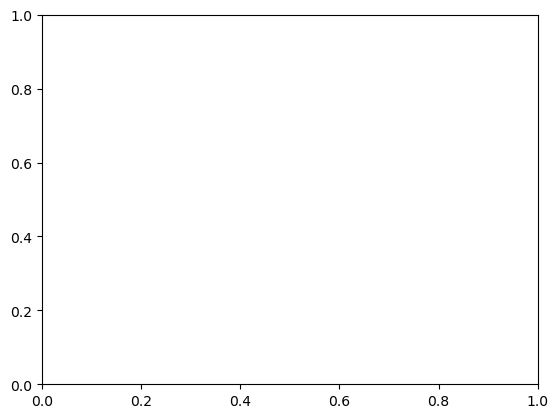

In [3]:
plt.subplots()

Итак, первое, что бросается в глаза, это пустой график. Так и задумано - мы инициализировали график, т.е. создали заготовку для него, но еще не добавили данные, поэтому на графике еще ничего нет. Давайте посмотрим на текст над графиком. Это то, что вернула нам функция `plt.subplots()`. Если посмотрим на документацию `matplotlib`, то увидим, что эта функция возвращает 2 объекта: объект класса **Figure** и один или несколько объектов класса **Axes**.

Фактически, эти 2 класса, **Figure** и **Axes**, определяют всю визуализацию. Объект класса **Figure** можно сравнить с холстом, на котором размещаются один или несколько индивидуальных графиков. Эти графики, в свою очередь, являются экземплярами класса **Axes**. Именно класс **Axes** отвечает за внутренности графика: данные, тип, форматирование осей и т.д. Объект класса **Figure** отвечает за внешний вид итоговой визуализации.

Итак, давайте обновим ячейку ноутбука, а именно - присвоим двум переменным результат функции `plt.subplots()`. 


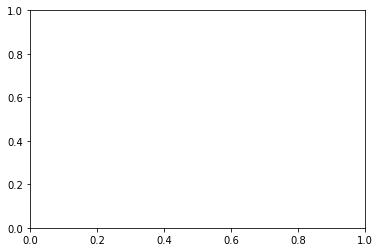

In [ ]:
fig, ax = plt.subplots()

Следующий этап – выбор типа графика и добавление данных. Давайте построим линейный график, на котором покажем динамику минимальной зарплаты в штате Вашингтон по годам. Сначала подготовим данные. Для этого из датафрейма выберем записи для штата Вашингтон, затем выберем только столбцы **Year** и **Salary**.  

Для того, чтобы построить линейный график, нужно вызвать метод `ax.plot()`. В этот метод передадим 2 массива – массив дат, который будет соответствовать оси Ох, и массив зарплат, величины которых будут отложены по оси Оу. 


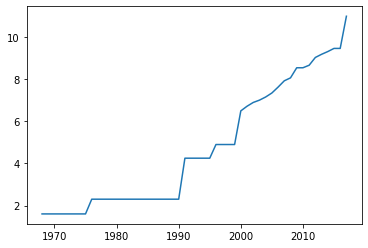

In [ ]:
fig, ax = plt.subplots()

data = df[df['State'] == 'Washington'][['Year', 'Salary']]

ax.plot(data['Year'], data['Salary']);

Нам определенно не хватает заголовка и подписей осей. Для добавления атрибутов можно использовать методы-сеттеры. Например, давайте дадим графику осмысленный и понятный заголовок с помощью метода `ax.set_title()`.

Подпишем оси и отформатируем отсечки на оси Ох. Давайте будем откладывать их не по круглым числам, как сейчас, а от минимального года до максимального с шагом в 10 лет. Мы уже умеем делать так с помощью функции `range`. Поскольку максимум не будет включен в итоговый список, добавим его отдельно. 

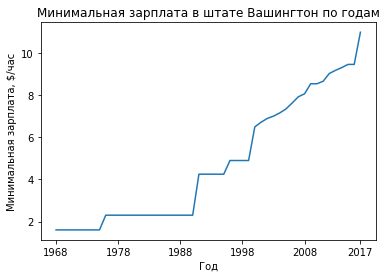

In [ ]:
fig, ax = plt.subplots()

data = df[df['State'] == 'Washington'][['Year', 'Salary']]

ax.plot(data['Year'], data['Salary'])
ax.set_title('Минимальная зарплата в штате Вашингтон по годам')
ax.set_xlabel('Год')
ax.set_ylabel('Минимальная зарплата, $/час')
ax.set_xticks(list(range(data['Year'].min(), data['Year'].max(),10))+[data['Year'].max()])

На этом настройку графика пока закончим. Давайте перейдем к последнему этапу создания визуализации, а именно выводу на экран. Вообще, мы видим, что график уже выведен на экран, однако . Это достаточно сильно затрудняет чтение ноутбука, поэтому давайте последней командой вызовем функцию `plt.show()`, которая выводит график на экран и не возвращает дополнительной информации.

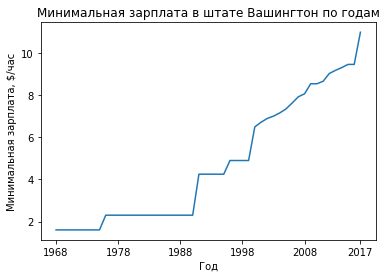

In [ ]:
fig, ax = plt.subplots()

data = df[df['State'] == 'Washington'][['Year', 'Salary']]

ax.plot(data['Year'], data['Salary'])
ax.set_title('Минимальная зарплата в штате Вашингтон по годам')
ax.set_xlabel('Год')
ax.set_ylabel('Минимальная зарплата, $/час')
ax.set_xticks(list(range(data['Year'].min(), data['Year'].max(),10))+[data['Year'].max()])

plt.show()

Мощь объектно-ориентированного подхода заключается в том, что он позволяет тонко контролировать все атрибуты графика. Например, давайте немного поднимем заголовок и сделаем его темно-синим. Для того, чтобы поднять или опустить заголовок, в метод **title** нужно передать параметр **pad**. Это отступ в пикселях от верхней границы графика до заголовка. По умолчанию этот параметр равен 6, давайте сделаем его 16. Чтобы задать цвет текста, нужно использовать параметр **color**, и в него передать цвет, например, **“navy”**, это темно-синий. 


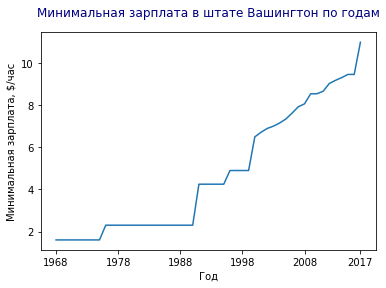

In [ ]:
fig, ax = plt.subplots()

data = df[df['State'] == 'Washington'][['Year', 'Salary']]

ax.plot(data['Year'], data['Salary'])
ax.set_title('Минимальная зарплата в штате Вашингтон по годам', pad = 16, color = 'navy')
ax.set_xlabel('Год')
ax.set_ylabel('Минимальная зарплата, $/час')
ax.set_xticks(list(range(data['Year'].min(), data['Year'].max(),10))+[data['Year'].max()])

plt.show()

Есть еще параметр **backgroundcolor**, который меняет задний фон текста. Давайте попробуем сделать у заголовка графика светло-серый фон.

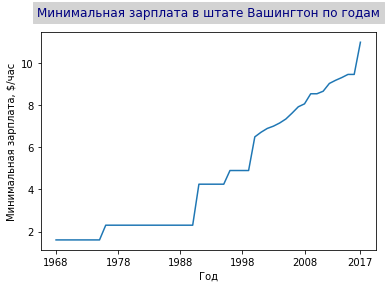

In [ ]:
fig, ax = plt.subplots()

data = df[df['State'] == 'Washington'][['Year', 'Salary']]

ax.plot(data['Year'], data['Salary'])
ax.set_title('Минимальная зарплата в штате Вашингтон по годам', pad = 16, color = 'navy', backgroundcolor = 'lightgray')
ax.set_xlabel('Год')
ax.set_ylabel('Минимальная зарплата, $/час')
ax.set_xticks(list(range(data['Year'].min(), data['Year'].max(),10))+[data['Year'].max()])

plt.show()

Отсечки по оси Ох кажутся слишком редкими. Давайте будем отмечать года не с 10-летним промежутком, а, например, с 5-летним. Для этого просто изменим 10 на 5 в функции range.

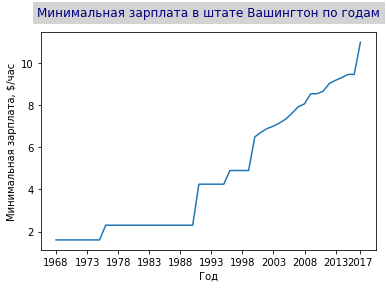

In [ ]:
fig, ax = plt.subplots()

data = df[df['State'] == 'Washington'][['Year', 'Salary']]

ax.plot(data['Year'], data['Salary'])
ax.set_title('Минимальная зарплата в штате Вашингтон по годам', pad = 16, color = 'navy', backgroundcolor = 'lightgray')
ax.set_xlabel('Год')
ax.set_ylabel('Минимальная зарплата, $/час')
ax.set_xticks(list(range(data['Year'].min(), data['Year'].max(),5))+[data['Year'].max()])

plt.show()